In [4]:
import pandas as pd
import numpy as np
import time
from validation.ensemble_backtester import FullBacktesterEnsemble, generate_config_list


# Define dimensions: 5000 days, 1000 assets (columns)
n_rows = 5000
n_cols = 1000
dates = pd.date_range(start="2010-01-01", periods=n_rows, freq="D")
columns = [f"Asset_{i}" for i in range(n_cols)]

# Generate random daily returns between -5% and +5%
returns = pd.DataFrame(
    np.random.uniform(-0.05, 0.05, size=(n_rows, n_cols)),
    index=dates,
    columns=columns
)
# Generate random turnover between 0 and 1
turnover = pd.DataFrame(
    np.random.uniform(0, 1, size=(n_rows, n_cols)),
    index=dates,
    columns=columns
)

# Define a minimal configuration grid (adjust as needed)
config_grid = {
    "first_os": ["2018-12-31"],
    "window_length": [24, 36, 48],
    "step_months": [3, 6],
    "anchored": [True],
    "risk_free_rate": [0.0],
    "top_n": [10],
    "max_corr": [0],
    "max_columns": [3],
    "min_avg_trade": [-10000],
    "metric_name": ["sharpe"]
}
config_list = generate_config_list(config_grid)

# Instantiate the backtester ensemble with the random returns and turnover DataFrames.
ensemble = FullBacktesterEnsemble(returns, turnover, config_list)
start_time = time.time()
results = ensemble.run()
elapsed = time.time() - start_time

print("Backtester Ensemble Results:")
print(results)
print(f"Time taken: {elapsed:.3f} seconds")



Running configuration: sharpe_WL24_AnchoredTrue_Step3
Running configuration: sharpe_WL24_AnchoredTrue_Step6
Running configuration: sharpe_WL36_AnchoredTrue_Step3
Running configuration: sharpe_WL36_AnchoredTrue_Step6
Running configuration: sharpe_WL48_AnchoredTrue_Step3
Running configuration: sharpe_WL48_AnchoredTrue_Step6
Backtester Ensemble Results:
{'sharpe_WL24_AnchoredTrue_Step3': {'full_oos_series': 2019-01-01    0.013536
2019-01-02    0.016235
2019-01-03   -0.004131
2019-01-04    0.003089
2019-01-05   -0.000049
                ...   
2023-06-26   -0.000038
2023-06-27   -0.021744
2023-06-28    0.017269
2023-06-29    0.001967
2023-06-30   -0.023534
Freq: D, Length: 1642, dtype: float64, 'overall_cumulative_return': -0.3923158884247917, 'overall_volatility': 0.018181283752303403, 'overall_sharpe': -0.007591651096851829, 'overall_avg_trade': -0.0002762896450550727}, 'sharpe_WL24_AnchoredTrue_Step6': {'full_oos_series': 2019-01-01    0.013536
2019-01-02    0.016235
2019-01-03   -0.004

In [8]:
wf_bundle = {k: results[k]['full_oos_series'] for k in results.keys()}
avg_trade = {k: round(20000 * results[k]['overall_avg_trade'], 1) for k in results.keys()}


<Axes: >

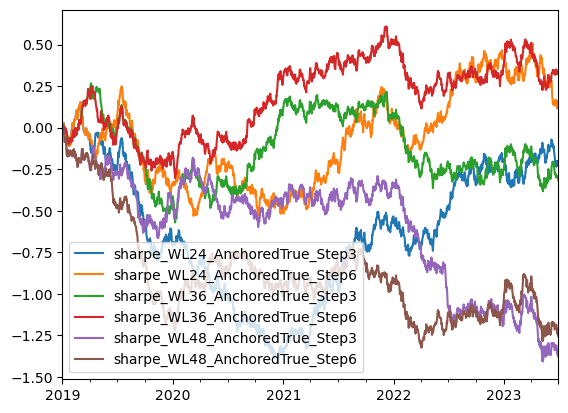

In [11]:
pd.concat(wf_bundle,axis = 1).cumsum().plot()

In [1]:
from validation.ensemble_backtester import FullBacktesterEnsemble
print("Import works!")


Import works!
